#**PROBLEMA DE NEGOCIO**


---




La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

#**1. Configuración del Ambiente**


---




In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [ ]:
df_banco = pd.read_csv("https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/fraud_dataset_example.csv")
df_banco.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
20093,8,CASH_IN,391051.47,C1342466480,5595253.09,5986304.55,C1030706332,4018826.37,3036551.46,0,0
50571,9,PAYMENT,28853.77,C296972958,22278.00,0.00,M556224975,0.00,0.00,0,0
6018,6,TRANSFER,833142.33,C852612805,0.00,0.00,C769342184,12803092.22,12782636.70,0,0
49258,9,CASH_OUT,33016.61,C995459777,298302.00,265285.39,C1050196275,3533648.21,3402289.18,0,0
38274,9,PAYMENT,28137.68,C689978499,15301.00,0.00,M1423162514,0.00,0.00,0,0
37756,9,PAYMENT,31786.43,C225468805,14986.00,0.00,M764928828,0.00,0.00,0,0
99850,10,PAYMENT,4405.21,C2146612741,820653.98,816248.76,M794291317,0.00,0.00,0,0
53291,9,CASH_OUT,481698.09,C1047964362,15917.00,0.00,C569922327,762648.19,1864836.24,0,0
48928,9,TRANSFER,22884.81,C769178692,351419.00,328534.19,C1864238657,11532.00,34416.81,0,0
28520,8,CASH_OUT,80738.24,C451791625,0.00,0.00,C1234363215,380636.12,353601.18,0,0


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
#@title
def procesar_datos():
  global df_banco, resultados
  df_banco=df_banco.copy()
  # Crea la nueva variable type2 con la combinación de la primera letra de las columnas nameOrig y nameDest
  df_banco['type2'] = df_banco['nameOrig'].str[0] + df_banco['nameDest'].str[0]


In [ ]:
procesar_datos()
df_banco.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CM
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CM


In [ ]:
# Realiza one-hot encoding de las columnas type y type2
df_encoded = pd.get_dummies(df_banco, columns=['type', 'type2'], dtype=int)
df_encoded.sample(10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
95222,10,199727.27,C723826309,113563.00,313290.27,C225831023,155074.00,206285.90,0,0,1,0,0,0,0,1,0
2736,2,7807.42,C1091597918,29982.00,22174.58,M463690173,0.00,0.00,0,0,0,0,0,1,0,0,1
70594,9,109534.19,C785376980,18292168.76,18401702.96,C341052391,403737.01,294202.82,0,0,1,0,0,0,0,1,0
911,1,7260.20,C1815370847,0.00,0.00,M1801021153,0.00,0.00,0,0,0,0,0,1,0,0,1
77576,10,54746.12,C133880197,206946.00,261692.12,C932569333,61215.63,6469.51,0,0,1,0,0,0,0,1,0
27223,8,1659.81,C878551459,10330.00,8670.19,C423583818,45307.73,46967.54,0,0,0,0,1,0,0,1,0
89900,10,5760.90,C1393444799,0.00,0.00,C1077045505,3070525.77,3076286.67,0,0,0,1,0,0,0,1,0
96642,10,1665523.46,C2099448385,48178.00,0.00,C1667392784,112771.00,0.00,0,0,0,0,0,0,1,1,0
44339,9,35081.60,C1897904252,0.00,0.00,C1194807938,1331056.96,1366138.56,0,0,0,1,0,0,0,1,0
89676,10,192878.65,C1842851527,6780600.10,6973478.75,C2064628653,962629.40,769750.76,0,0,1,0,0,0,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   amount          101613 non-null  float64
 2   nameOrig        101613 non-null  object 
 3   oldbalanceOrg   101613 non-null  float64
 4   newbalanceOrig  101613 non-null  float64
 5   nameDest        101613 non-null  object 
 6   oldbalanceDest  101613 non-null  float64
 7   newbalanceDest  101613 non-null  float64
 8   isFraud         101613 non-null  int64  
 9   isFlaggedFraud  101613 non-null  int64  
 10  type_CASH_IN    101613 non-null  int64  
 11  type_CASH_OUT   101613 non-null  int64  
 12  type_DEBIT      101613 non-null  int64  
 13  type_PAYMENT    101613 non-null  int64  
 14  type_TRANSFER   101613 non-null  int64  
 15  type2_CC        101613 non-null  int64  
 16  type2_CM        101613 non-null  int64  
dtypes: float64

In [ ]:
# Lista de columnas a eliminar
columns_to_drop = ['nameOrig', 'nameDest', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
# Elimina las columnas del DataFrame
df_encoded.drop(columns=columns_to_drop, inplace=True)
# Resetea el índice
df_encoded.reset_index(drop=True, inplace=True)
df_encoded


,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,0,0,0,0,1,0,0,1
1,1,1864.28,0,0,0,0,1,0,0,1
2,1,181.00,1,0,0,0,0,1,1,0
3,1,181.00,1,0,1,0,0,0,1,0
4,1,11668.14,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
101608,10,7477.02,0,0,0,0,1,0,0,1
101609,10,282252.35,0,0,1,0,0,0,1,0
101610,10,17289.01,0,0,0,0,1,0,0,1
101611,10,1347146.45,0,0,0,0,0,1,1,0


In [ ]:
# Elimina registros duplicados y guarda el resultado en df_banco
df_banco = df_encoded.drop_duplicates()

In [ ]:
# Elimina registros con valores nulos y restablece el índice
df_banco.dropna(inplace=True)
df_banco.reset_index(drop=True, inplace=True)

In [ ]:
df_banco

,step,amount,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM
0,1,9839.64,0,0,0,0,1,0,0,1
1,1,1864.28,0,0,0,0,1,0,0,1
2,1,181.00,1,0,0,0,0,1,1,0
3,1,181.00,1,0,1,0,0,0,1,0
4,1,11668.14,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
101513,10,7477.02,0,0,0,0,1,0,0,1
101514,10,282252.35,0,0,1,0,0,0,1,0
101515,10,17289.01,0,0,0,0,1,0,0,1
101516,10,1347146.45,0,0,0,0,0,1,1,0


In [ ]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101518 entries, 0 to 101517
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           101518 non-null  int64  
 1   amount         101518 non-null  float64
 2   isFraud        101518 non-null  int64  
 3   type_CASH_IN   101518 non-null  int64  
 4   type_CASH_OUT  101518 non-null  int64  
 5   type_DEBIT     101518 non-null  int64  
 6   type_PAYMENT   101518 non-null  int64  
 7   type_TRANSFER  101518 non-null  int64  
 8   type2_CC       101518 non-null  int64  
 9   type2_CM       101518 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.7 MB


#**3. Exploración de Datos**


---


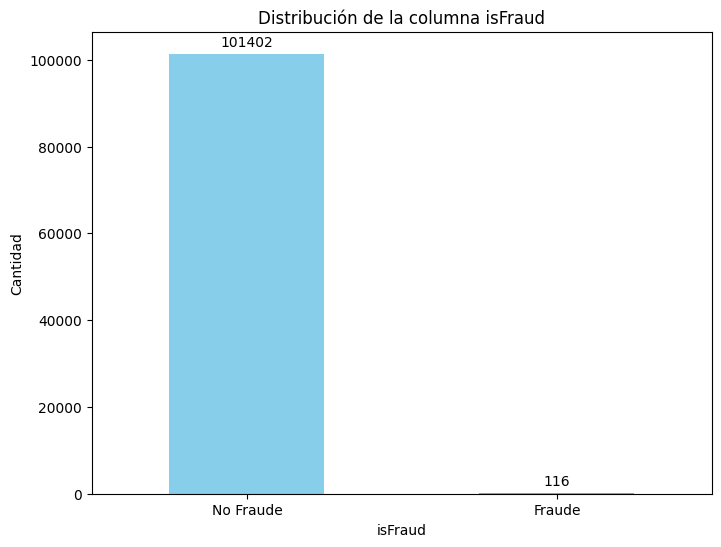

In [ ]:
# Contar los valores de la columna isFraud
conteo_isfraud = df_banco['isFraud'].value_counts()

# Crear el gráfico de barras verticales
plt.figure(figsize=(8, 6))
conteo_isfraud.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la columna isFraud')
plt.xlabel('isFraud')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
# Agregar los valores encima de las barras
for i, valor in enumerate(conteo_isfraud):
    plt.text(i, valor + 0.01 * max(conteo_isfraud), str(valor), ha='center', va='bottom')

plt.show()

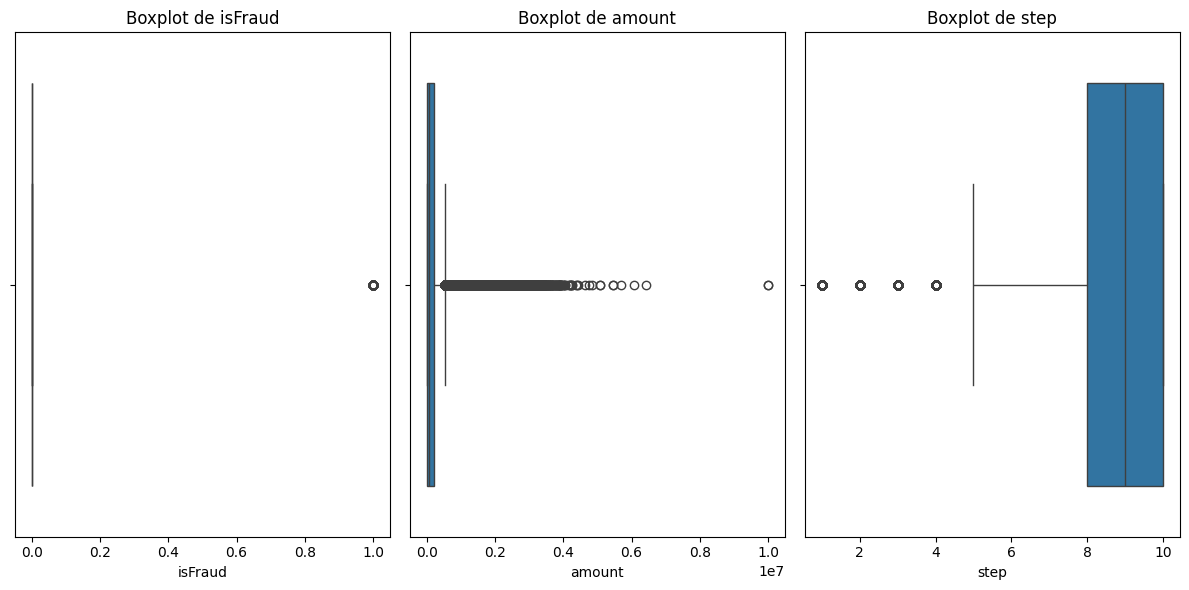

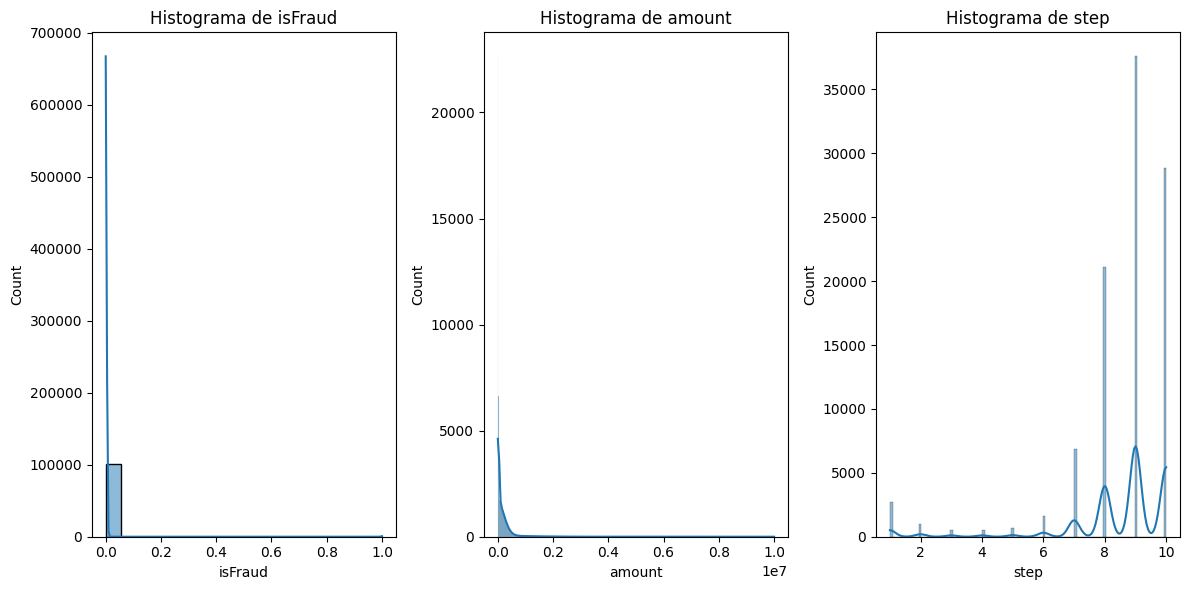

In [ ]:
def boxplot_histogramas():

  # Definir los atributos a graficar
  atributos = ['isFraud', 'amount', 'step']  # Puedes agregar más atributos aquí si lo deseas

  # Generar gráficos de boxplot
  plt.figure(figsize=(12, 6))
  for i, atributo in enumerate(atributos, 1):
      plt.subplot(1, len(atributos), i)
      sns.boxplot(x=df_banco[atributo])
      plt.title(f'Boxplot de {atributo}')
  plt.tight_layout()
  plt.show()

  # Generar histogramas
  plt.figure(figsize=(12, 6))
  for i, atributo in enumerate(atributos, 1):
      plt.subplot(1, len(atributos), i)
      sns.histplot(df_banco[atributo], kde=True)
      plt.title(f'Histograma de {atributo}')
  plt.tight_layout()
  plt.show()
boxplot_histogramas()

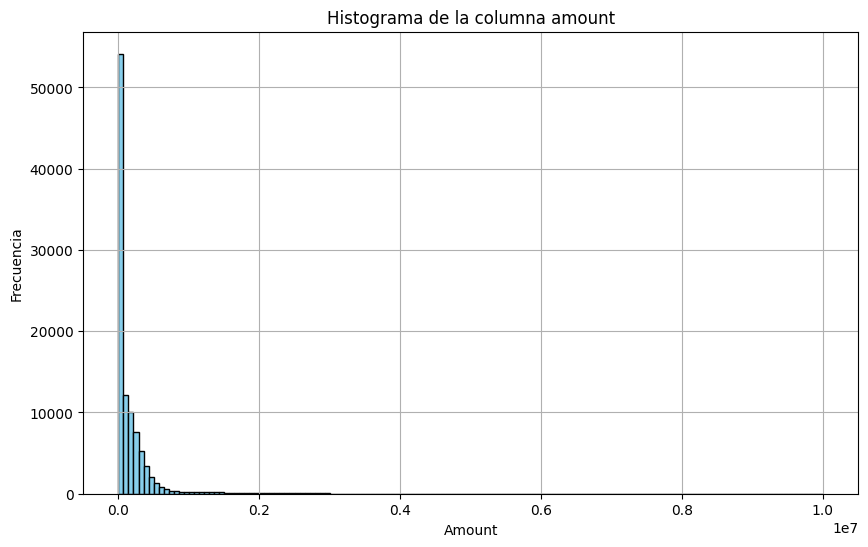

In [ ]:
import matplotlib.pyplot as plt
# Crear el histograma de la columna 'amount'
plt.figure(figsize=(10, 6))
plt.hist(df_banco['amount'], bins=140, color='skyblue', edgecolor='black')
plt.title('Histograma de la columna amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#@title


def balanceo_clases():
    global df_banco, resultados

    # Instancia SMOTE
    smote = SMOTE(random_state=42)

    # Balanceo de clases
    X_res, y_res = smote.fit_resample(df_banco.drop(columns=['isFraud']), df_banco['isFraud'])

    # Reconstrucción del DataFrame balanceado
    df_banco = pd.DataFrame(X_res, columns=df_banco.drop(columns=['isFraud']).columns)
    df_banco['isFraud'] = y_res

    # Elimina registros duplicados
    df_banco.drop_duplicates(inplace=True)
    df_banco.reset_index(drop=True, inplace=True)

# Llama a la función balanceo_clases
balanceo_clases()

# Imprime el resultado final
df_banco


,step,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM,isFraud
0,1,9.839640e+03,0,0,0,1,0,0,1,0
1,1,1.864280e+03,0,0,0,1,0,0,1,0
2,1,1.810000e+02,0,0,0,0,1,1,0,1
3,1,1.810000e+02,0,1,0,0,0,1,0,1
4,1,1.166814e+04,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
183741,9,2.749602e+05,0,0,0,0,0,1,0,1
183742,2,2.100600e+06,0,0,0,0,0,1,0,1
183743,7,4.665051e+05,0,0,0,0,0,1,0,1
183744,5,2.310694e+03,0,0,0,0,0,1,0,1


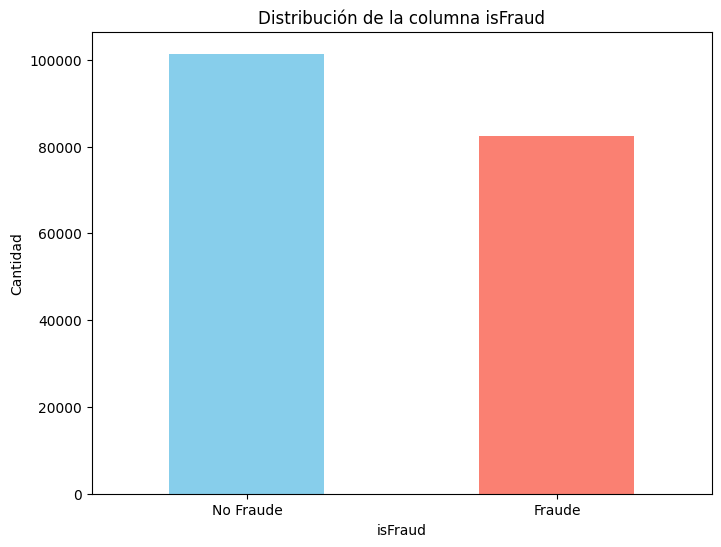

In [ ]:
# Contar los valores de la columna isFraud
conteo_isfraud = df_banco['isFraud'].value_counts()

# Crear el gráfico de barras verticales
plt.figure(figsize=(8, 6))
conteo_isfraud.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de la columna isFraud')
plt.xlabel('isFraud')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraude', 'Fraude'], rotation=0)
plt.show()

In [ ]:
balanceo_clases()
ProfileReport(df_banco)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**4. Construcción de Modelos**


---


In [ ]:
df_banco.head(5)

,step,amount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type2_CC,type2_CM,isFraud
0,1,9839.64,0,0,0,1,0,0,1,0
1,1,1864.28,0,0,0,1,0,0,1,0
2,1,181.00,0,0,0,0,1,1,0,1
3,1,181.00,0,1,0,0,0,1,0,1
4,1,11668.14,0,0,0,1,0,0,1,0


#Multinomial

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def crea_modelos():
    # variables de ámbito global
    global df_banco, resultados

    y = df_banco['isFraud']
    x = df_banco.drop(columns='isFraud')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=123)

    #### Modelo de Regresión Logística
    regresion_logistica = LogisticRegression()
    regresion_logistica.fit(train_x, train_y)
    predictions = regresion_logistica.predict(test_x)
    accuracy_regresion_logistica = accuracy_score(test_y, predictions)
    precision_regresion_logistica = precision_score(test_y, predictions)

    #### Modelo de Árbol de Decisión
    dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dtc.fit(train_x, train_y)
    prediccion_ArbolDecision = dtc.predict(test_x)
    accuracy_ArbolDecision = accuracy_score(test_y, prediccion_ArbolDecision)
    precision_ArbolDecision = precision_score(test_y, prediccion_ArbolDecision)

    #### Modelo de Random Forest
    rfc = RandomForestClassifier()
    rfc.fit(train_x, train_y)
    prediccion_RandomForest = rfc.predict(test_x)
    accuracy_RandomForest = accuracy_score(test_y, prediccion_RandomForest)
    precision_RandomForest = precision_score(test_y, prediccion_RandomForest)

    #### Modelo de Naive Bayes Multinomial
    mnb = MultinomialNB()
    mnb.fit(train_x, train_y)
    prediccion_MNB = mnb.predict(test_x)
    accuracy_naive_bayes = accuracy_score(test_y, prediccion_MNB)
    precision_naive_bayes = precision_score(test_y, prediccion_MNB)

    #### Métricas adicionales
    recall_regresion_logistica = recall_score(test_y, predictions)
    recall_arbol_decision = recall_score(test_y, prediccion_ArbolDecision)
    recall_random_forest = recall_score(test_y, prediccion_RandomForest)
    recall_naive_bayes = recall_score(test_y, prediccion_MNB)

    f1_score_regresion_logistica = f1_score(test_y, predictions)
    f1_score_ArbolDecision = f1_score(test_y, prediccion_ArbolDecision)
    f1_score_random_forest = f1_score(test_y, prediccion_RandomForest)
    f1_score_naive_bayes = f1_score(test_y, prediccion_MNB)

    auc_roc_regresion_logistica = roc_auc_score(test_y, predictions)
    auc_roc_ArbolDecision = roc_auc_score(test_y, prediccion_ArbolDecision)
    auc_roc_random_forest = roc_auc_score(test_y, prediccion_RandomForest)
    auc_roc_naive_bayes = roc_auc_score(test_y, prediccion_MNB)

    #### Almacenar los resultados
    accuracy = [accuracy_regresion_logistica, accuracy_ArbolDecision, accuracy_RandomForest, accuracy_naive_bayes]
    precision = [precision_regresion_logistica, precision_ArbolDecision, precision_RandomForest, precision_naive_bayes]
    recall = [recall_regresion_logistica, recall_arbol_decision, recall_random_forest, recall_naive_bayes]
    f1_scores = [f1_score_regresion_logistica, f1_score_ArbolDecision, f1_score_random_forest, f1_score_naive_bayes]
    auc_roc = [auc_roc_regresion_logistica, auc_roc_ArbolDecision, auc_roc_random_forest, auc_roc_naive_bayes]

    resultados = {
        'Nombre_Modelo': ['Regresion Logistica', 'Arbol de Decision', 'Random Forest', 'Naive Bayes'],
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_scores,
        'AUC_ROC': auc_roc
    }

    #### Imprimir las matrices de confusión
    print("Matriz de confusion de la regresion logistica\n", confusion_matrix(test_y, predictions))
    print("Matriz de confusion del arbol de decision\n", confusion_matrix(test_y, prediccion_ArbolDecision))
    print("Matriz de confusion del random forest\n", confusion_matrix(test_y, prediccion_RandomForest))
    print("Matriz de confusion de Naive Bayes\n", confusion_matrix(test_y, prediccion_MNB))
    print("-------")


#Crea modelos

In [ ]:
crea_modelos()
for i, model in enumerate(resultados['Nombre_Modelo']):
    print(f"Modelo: {model}")
    print(f"Accuracy: {resultados['Accuracy'][i]}")
    print(f"Precisión: {resultados['Precision'][i]}")
    print(f"Recall: {resultados['Recall'][i]}")
    print(f"F1-score: {resultados['F1_Score'][i]}")
    print(f"AUC-ROC: {resultados['AUC_ROC'][i]}\n")
    print("-------")

Matriz de confusion de la regresion logistica
 [[    0 30426]
 [    0 30413]]
Matriz de confusion del arbol de decision
 [[29618   808]
 [  756 29657]]
Matriz de confusion del random forest
 [[29611   815]
 [  747 29666]]
Matriz de confusion de Naive Bayes
 [[26474  3952]
 [20159 10254]]
-------
Modelo: Regresion Logistica
Accuracy: 0.4998931606370913
Precisión: 0.4998931606370913
Recall: 1.0
F1-score: 0.6665716915793626
AUC-ROC: 0.5

-------
Modelo: Arbol de Decision
Accuracy: 0.97429280560167
Precisión: 0.9734777613655013
Recall: 0.9751422089238154
F1-score: 0.9743092742862773
AUC-ROC: 0.9742929870623153

-------
Modelo: Random Forest
Accuracy: 0.9743256792517957
Precisión: 0.9732620320855615
Recall: 0.9754381350080558
F1-score: 0.9743488685256346
AUC-ROC: 0.974325916909142

-------
Modelo: Naive Bayes
Accuracy: 0.6036917109091208
Precisión: 0.7218076868928621
Recall: 0.33715845197777267
F1-score: 0.4596248235056814
AUC-ROC: 0.6036347705888995

-------


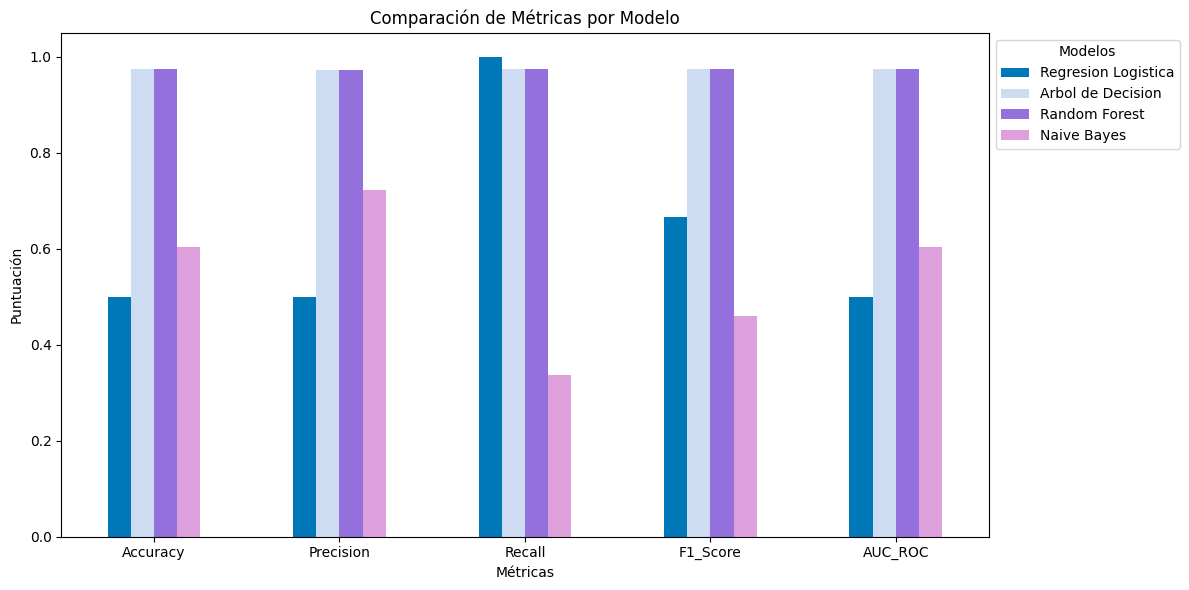

In [ ]:
# Comparación de Métricas por modelo

results_df = pd.DataFrame(resultados)
results_df.set_index('Nombre_Modelo', inplace=True)
results_df = results_df.T
colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
plt.title('Comparación de Métricas por Modelo')
plt.xlabel('Métricas')
plt.ylabel('Puntuación')
plt.legend(title='Modelos', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Comparación de Modelops por modelo

results_df = pd.DataFrame(resultados)
results_df.set_index('Nombre_Modelo', inplace=True)
#transpone el dataframe donde columnas, ahora filas y viceversa.
colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
plt.title('Comparación de Modelos por métricas')
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.legend(title='Métricas', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
